# Generate Toy Data

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import random
n_samples = 750
n_features = 2
dims = 41
# centers = [[10]*dims, [-5]*dims, [7]*dims, [30]*dims, [-11]*dims]
cstd=0.8

centers = list()
for i in range(0,10):
    centers.append([random.randint(-50,50) for x in range(dims)])

X, labels_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cstd)
# X = StandardScaler().fit_transform(X)

# Reduce Dimension

In [2]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Plt Data w/ True Labels

//anaconda/envs/bigd2/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


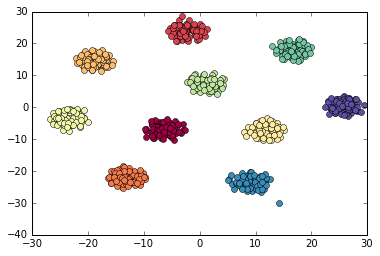

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt



# pca = PCA(n_components=2)
# pca.fit(X)
# z = pca.transform(X) 


# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]

labels = labels_true
core_samples_mask = np.zeros_like(labels_true, dtype=bool)
core_sample_indices = np.arange(n_samples)
core_samples_mask[core_sample_indices] = True
# labels = db.labels_



# # Black removed and is used for noise instead.
unique_labels = set(labels_true)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

# Perform DBSCAN and Plot Data w/ DBSCAN labels

CPU times: user 24.4 ms, sys: 3.5 ms, total: 27.9 ms
Wall time: 29.7 ms


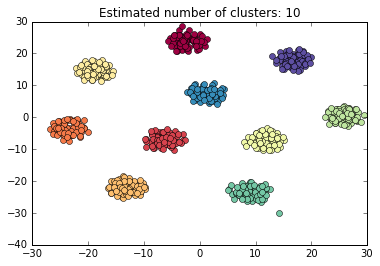

In [4]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Compute DBSCAN
%time db = DBSCAN(eps=10, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Reduce dimensions
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Using Annoy

In [5]:
from annoy import AnnoyIndex
from sklearn.cluster import DBSCAN
t = None
t = AnnoyIndex(dims)
for i in xrange(0,len(X)):
    t.add_item(i, X[i])

t.build(15)
n_neighbors = 75

tempnns = [np.array(t.get_nns_by_item(i, n_neighbors), dtype=np.int64) for i in xrange(0,len(X))]
tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)

model = {'neighborhoods':neighborhoods}

print "Done\nClustering"
%time db = DBSCAN(eps=0.0001, min_samples=20, algorithm="LSHF", lshModel=model).fit(X)
print "Finished"
print "unique labels: {}".format(set(db.labels_))

Done
Clustering
CPU times: user 2.37 ms, sys: 1.06 ms, total: 3.43 ms
Wall time: 2.79 ms
Finished
unique labels: set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


# DBSCAN with Annoy

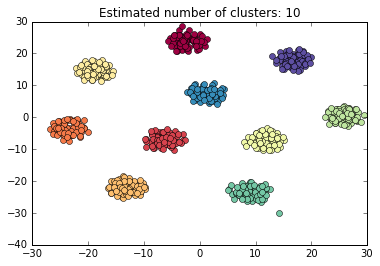

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Reduce dimensions
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)




# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Real Data

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import bcolz as bc
from annoy import AnnoyIndex
import sys
X = bc.open('/Users/lsxliron/Desktop/Fortran_INP-FLUX/y2005R','r')
# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]
t=None
dims=41
t = AnnoyIndex(dims)

print "Adding Vectors"
for i in xrange(0,len(X)):
    if i%10000 == 0:
        print i
    t.add_item(i, X[i])
# print i

print "Building trees"
t.build(25)
print "Done building"
# t.save('/Users/lsxliron/Desktop/Untitled Folder/anns/2005Full.ann')

# t.load('/Users/lsxliron/Desktop/Untitled Folder/anns/2005Full.ann')
# X=X[0:600]
n_neighbors = 500
r=1
# # OPTIMIZED
print "Performing Queries"
tempnns = [np.array([j[0] for j in zip(*(t.get_nns_by_item(i,n_neighbors,include_distances=True))) if j[1]<r],dtype=np.int64) for i in xrange(0,len(X))]
# print "Done\n"
# # tempnns=list()
# # for i in range(0,len(X)):
# #     ind, dist = t.get_nns_by_item(i, n_neighbors, include_distances=True)
# #     temp = [ind[i] for i in xrange(len(ind)) if dist[i]<r]
# #     tempnns.append(np.array(temp, dtype=np.int64))
    

tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)
lshModel = {'neighborhoods':neighborhoods}


print "Done\nClustering"
%time db = DBSCAN(eps=r, min_samples=300, algorithm="LSH", lshModel=lshModel).fit(X)
print "Finished"
unique = set(db.labels_)
print "Total Clusters: {}".format(len(unique))
print "unique labels: {}".format(unique)

for item in unique:
    print "Cluster {} has {} members".format(item, db.labels_.tolist().count(item))

Adding Vectors
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
137



# Plot Real Data

In [ ]:
lshModel = {'neighborhoods':neighborhoods}
%time db = DBSCAN(eps=r, min_samples=3, algorithm="LSH", lshModel=lshModel).fit(X)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
fig = plt.figure(figsize=(12, 12), dpi=100)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Reduce dimensions
print "Reducing..."
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)
# try:
#     filename = "Jan2005TSNE10KG20R0-05.npy"
#     np.save(filename, z)
# except:
#     pass
print "Done Reduction\nPlotting"

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)




# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Statistical Plotting

In [2]:
import numpy as np
from math import ceil
# np.load('Jan2005TSNE10KG20R0-05.npy')
totalPoints = float(len(X))#50000.0
unique_labels = set(db.labels_)
orig_clusters = list()
for lb in unique_labels:
    orig_clusters.append(db.labels_.tolist().count(lb)/totalPoints)

totalPointInGraph = [int(x*2000) for x in orig_clusters]
pointsIndexesToPlot = list()
pointsLabelsToPlot = list()
for i,c in zip(xrange(len(unique_labels)), unique_labels):
    cluster_indexes = np.where(db.labels_ == c)[0]
    points = np.random.choice(cluster_indexes, size=totalPointInGraph[i])
    pointsIndexesToPlot.extend(points)
    pointsLabelsToPlot.extend([c]*totalPointInGraph[i])


finalPointsToPlot = np.array([X[i] for i in pointsIndexesToPlot])

Reducing...


/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


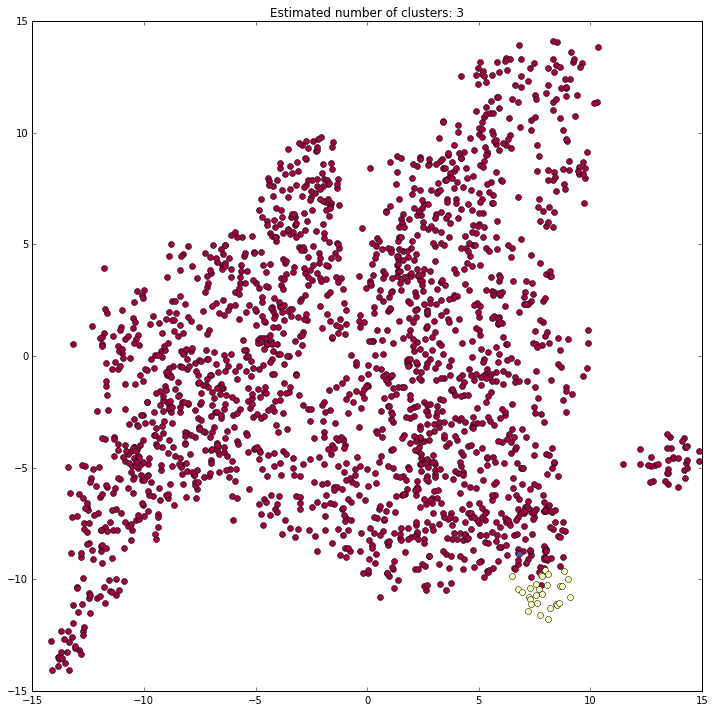

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(12, 12), dpi=100)

core_samples_mask = np.zeros_like(pointsLabelsToPlot, dtype=bool)
core_samples_mask[np.arange(len(finalPointsToPlot))] = True
labels = pointsLabelsToPlot

print "Reducing..."
model = TSNE(n_components=3, random_state=0)#, metric='manhattan')
z = model.fit_transform(finalPointsToPlot)



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# z=finalPointsToPlot



# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'.', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 3D Plotting

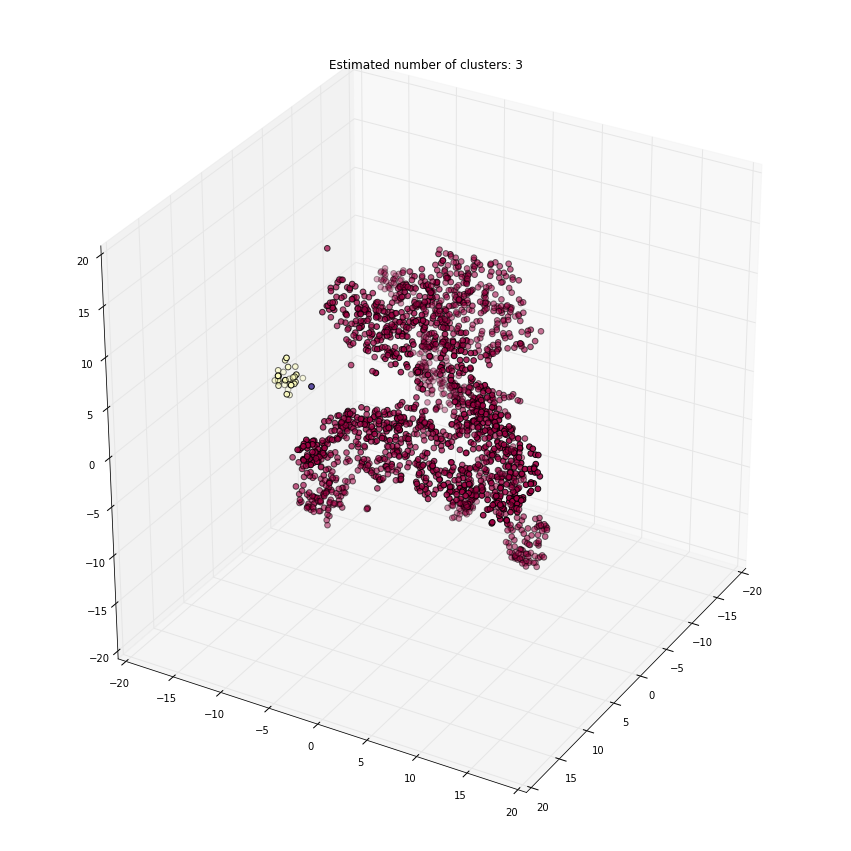

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15), dpi=100)
ax = fig.add_subplot(111, projection='3d')

core_samples_mask = np.zeros_like(pointsLabelsToPlot, dtype=bool)
core_samples_mask[np.arange(len(finalPointsToPlot))] = True
labels = pointsLabelsToPlot

# print "Reducing..."
# model = TSNE(n_components=3, random_state=0)
# z = model.fit_transform(finalPointsToPlot)



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# z=finalPointsToPlot



# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2],'o', c=col, s=32)

    xy = z[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], '.', c=col,s=32)

plt.title('Estimated number of clusters: %d' % n_clusters_)
ax.view_init(azim=30)
plt.show()

# PlotLy Test

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

py.sign_in('lsxliron', 'cutjnhz00h')

xy = z[class_member_mask & core_samples_mask]
c=list()
# c.extend([0]*1500)
# c.extend([10]*1500)
# c.extend([20]*2000)
trace1 = go.Scatter3d(
    x=z[:,0],
    y=z[:,1],
    z=z[:,2],
    text=["Pt. ID: {}".format(i) for i in pointsIndexesToPlot],
    mode='markers',
    marker=dict(size=6, 
                color=[db.labels_[l] for l in pointsIndexesToPlot],
                colorscale='Viridis', 
                opacity=0.3)
)

data = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        b=0,
        r=0,
        t=0
    )
)

figg = go.Figure(data=data, layout=layout)
py.iplot(figg, filename='3d-scatter-colorscale')

NameError: name 'X' is not defined